## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [38]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [39]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


3) Какие типы данных у элементов этого датасета?

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [42]:
df.isnull().any().sum()

0

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Их нету ;)

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [43]:
set(df['workclass'])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

7) Какой средний возраст женщин и мужчин?

In [44]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

([<matplotlib.patches.Wedge at 0x18c212a6cc0>,
 [Text(0.5820899380125792, 0.9333655790013428, ' HS-grad'),
  Text(-1.0080460983118946, 0.44027612208495526, ' Some-college'),
  Text(-0.7597721283465596, -0.7954535266046276, ' Bachelors'),
  Text(-0.08741327393996691, -1.096521280933068, ' Masters'),
  Text(0.24008494758967386, -1.0734799569348576, ' Assoc-voc'),
  Text(0.4949730840386798, -0.9823449730503222, ' 11th'),
  Text(0.694280840521506, -0.8532139910273104, ' Assoc-acdm'),
  Text(0.8450166685674572, -0.704234925179912, ' 10th'),
  Text(0.942102978552347, -0.5678397465859502, ' 7th-8th'),
  Text(1.0023572365721214, -0.45307832688344374, ' Prof-school'),
  Text(1.0443802910268456, -0.3453546115439627, ' 9th'),
  Text(1.0715349148116406, -0.2486220552155627, ' 12th'),
  Text(1.0882384969803631, -0.16042747174321548, ' Doctorate'),
  Text(1.0969578840449365, -0.0817520680573624, ' 5th-6th'),
  Text(1.099626774868771, -0.02865232960346699, ' 1st-4th'),
  Text(1.0999866828441163, -0.0

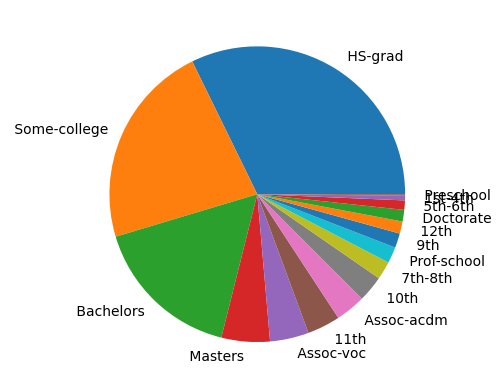

In [45]:
counts = df['education'].value_counts()

plt.pie(counts, labels=counts.index)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [46]:
df.groupby('income')['age'].agg(['mean', 'std'])

,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [47]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
high_educatiion_labels = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

result = df[df['income'] == ' >50K']['education'].isin(high_educatiion_labels)
print(result)

7        False
8        False
9        False
10       False
11       False
         ...  
32539    False
32545    False
32554    False
32557    False
32560    False
Name: education, Length: 7841, dtype: bool


Не правда :)

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [50]:
df['marital.status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [51]:
df['marital.status'].str.startswith(' Married').sum()

15417

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [57]:
rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 10)

print(df.groupby(['income', 'native.country'])['hours.per.week'].agg('mean'))

pd.set_option('display.max_rows', rows)

income  native.country 
<=50K   ?                  40.164760
        Cambodia           41.416667
        Canada             37.914634
        China              37.381818
        Columbia           38.684211
                             ...    
>50K    Thailand           58.333333
        Trinadad&Tobago    40.000000
        United-States      45.505369
        Vietnam            39.200000
        Yugoslavia         49.500000
Name: hours.per.week, Length: 82, dtype: float64


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [67]:
import numpy as np

pd.set_option('display.max_rows', None)

df['passive_income'] = df['capital.gain'] - df['capital.loss']
print(df['passive_income'].unique())

bins = np.linspace(df['passive_income'].min(), df['passive_income'].max(), 10)
print(bins)


df['binned_passive_income'] = df['passive_income'].apply(lambda x: bins[np.argmin(np.abs(bins-x))])
print(df['binned_passive_income'].unique())


df.groupby('education')['passive_income'].agg('mean')

[ 2174     0 14084  5178 -2042 -1408 -1902  5013  2407 14344 -1573 15024
  7688 34095 -1887  4064 -1719 -1762  4386 -1564 -2179 -1816 -1980 -1977
  7298 -1876 -1340 -2206  1409  3674 -1741  1055  3464 -1485  2050 -2339
 -2415  2176   594 -1380 20051  6849  4101  1111  8614  3411 -1721  2597
 25236 -2051  4650  9386 -2377 -1669 -2352  2463  3103 -1672  -653 10605
 -2392  2964  3325 -1504  2580 -2001  3471 -1590 -1651  4865 99999  6514
 -1628  1471  2329 -1848  2105  2885 25124 10520 -1740  2202 -2002  2961
 27828  6767  2228 -1579  1506 13550  2635 -2258  5556 -1602  -419  4787
  3781  3137 -2547 -2174  3818  3942   914   401  2829  2977  4934 -2205
 -1726 -2444  2062 -1138 -2238  2354  5455 15020  1424  -625  3273 22040
  -213  4416  3908 10566   991  4931  1086 -1539  -880  7430  6497   114
 -1668  7896  2346 -1092 -1594  3418 -3004 -2231 -1844  -810  3432 -2824
  2907  1151 -2559  2414  2290 -2057 15831 41310  4508 -1974  2538  -974
  3456 -2149  6418 -1825 -1735 -1258 -2129  1848  3

education
10th              347.728832
11th              165.018723
12th              251.750577
1st-4th            77.547619
5th-6th           107.768769
7th-8th           168.270898
9th               313.091440
Assoc-acdm        546.980319
Assoc-voc         642.296671
Bachelors        1637.949206
Doctorate        4507.300242
HS-grad           506.333492
Masters          2395.843877
Preschool         831.901961
Prof-school     10183.213542
Some-college      527.187080
Name: passive_income, dtype: float64

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [81]:
counts_high_income = df['income'].apply(lambda x: (x == ' >50K')).sum()

7841

In [98]:
counts_high_income = df.groupby('native.country')['income'].apply(lambda x: (x == ' >50K').sum())
counts_total = df.groupby('native.country')['income'].count()

proportions = counts_high_income / counts_total

print("Количество людей с доходом '>50K':")
print(counts_high_income)
print("\nОбщее количество людей:")
print(counts_total)
print("\nДоли по странам:")
print(proportions)

max_country = proportions.idxmax()
max_proportion = proportions.max()

print(f"\nСтрана с наибольшей долей: {max_country}")
print(f"Доля: {max_proportion:.2%}")

Количество людей с доходом '>50K':
native.country
?                              146
Cambodia                         7
Canada                          39
China                           20
Columbia                         2
Cuba                            25
Dominican-Republic               2
Ecuador                          4
El-Salvador                      9
England                         30
France                          12
Germany                         44
Greece                           8
Guatemala                        3
Haiti                            4
Holand-Netherlands               0
Honduras                         1
Hong                             6
Hungary                          3
India                           40
Iran                            18
Ireland                          5
Italy                           25
Jamaica                         10
Japan                           24
Laos                             2
Mexico                          33
Nicar

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary